In [1]:
#import packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx

In [2]:
#read the dataset
df = pd.read_csv('Vienna subway.csv', sep=';', )

In [44]:
df.head()

,Start,Stop,Line,Color
0,Oberlaa,Neulaa,1,red
1,Neulaa,Alaudagasse,1,red
2,Alaudagasse,Altes Landgut,1,red
3,Altes Landgut,Troststrasse,1,red
4,Troststrasse,Reumannplatz,1,red


First, we would like to have a look at every subway route. We can do this by plotting a graph for respective routes. Let's define a function with the line color as the parameter. 

In [88]:
def graph_of_nodes(color):
    #getting every stations in the 'Start' and 'Stop' columns
    start = [start for start in df[df.Color == color]['Start']]
    stop = [stop for stop in df[df.Color == color]['Stop']]
    #initialising a graph and adding nodes from the start list
    g = nx.Graph()
    g.add_nodes_from(start)
    #adding edges between every start and respective stop
    for (u, v) in zip(start, stop):
        g.add_edge(u, v)
    nx.draw(g, node_color = color, with_labels = True)
    plt.show()

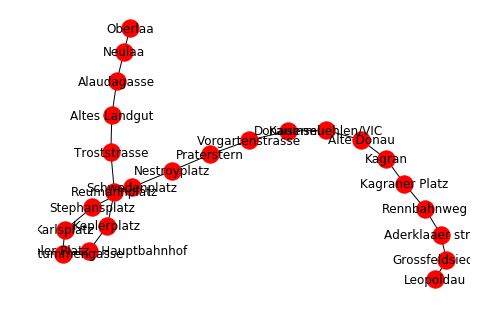

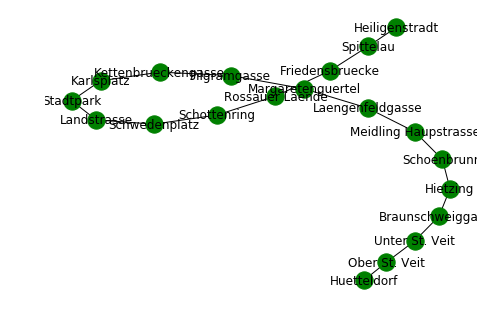

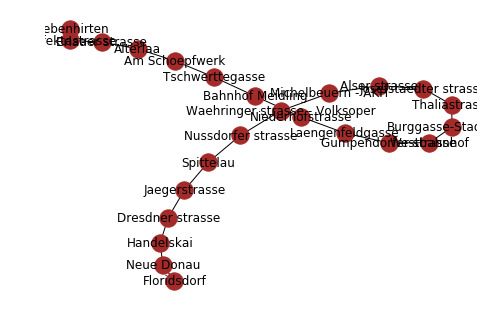

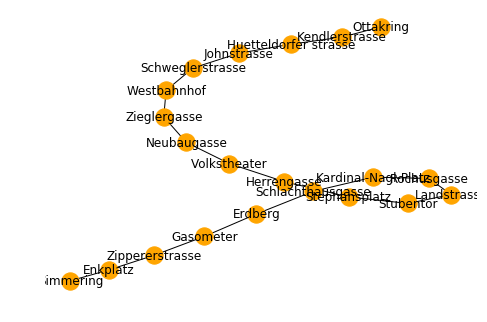

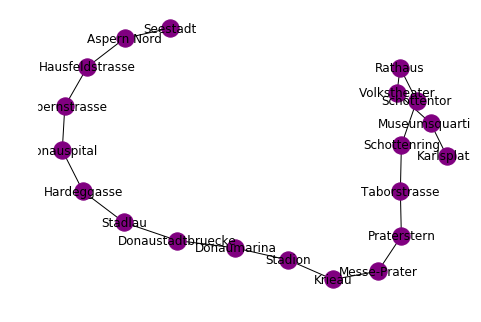

In [89]:
#print the graph of every route by their colours
for color in set(df['Color']):
    graph_of_nodes(color)

## Graph plotting

Let's have a look at the overall Vienna subway route.

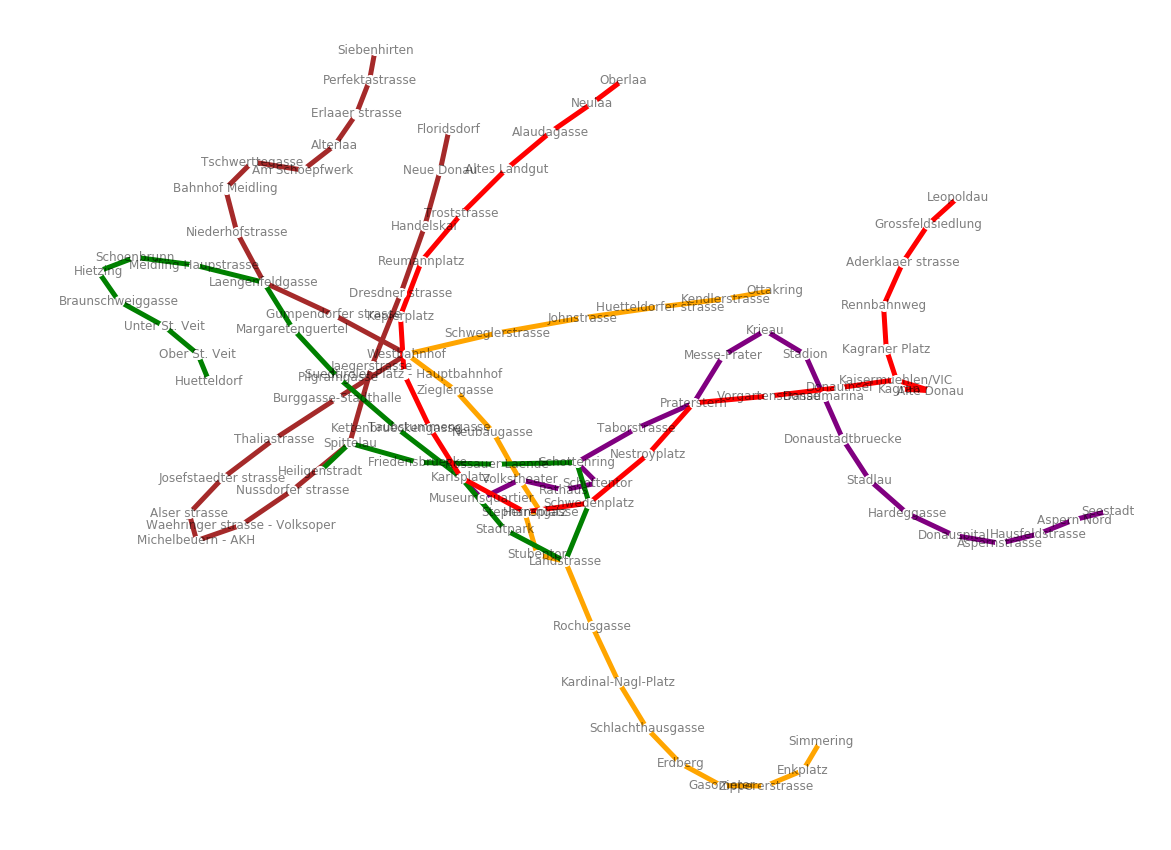

In [3]:
G = nx.Graph()
#getting a unique array of stations
stations = pd.unique(df[['Start', 'Stop']].values.flatten())
#adding the stations as nodes
for station in stations:
    G.add_node(station)

#iterate over rows
for i, series in df.iterrows():
    u = series['Start']
    v = series['Stop']
    line = series['Line']
    color = series['Color']
    #adding edge between every start and its stop
    G.add_edge(u, v, line = line, color=color)
       
plt.figure(figsize=(20, 15))
#a dictionary of positions keyed by nodes
pos = nx.spring_layout(G, k=0.1)
#get a list of edges keyed by colour and draw them
for color in set(df['Color']):
    edgelist = [e for e, c in nx.get_edge_attributes(G, 'color').items() if c == color]
    nx.draw_networkx_edges(G, pos, edgelist = edgelist, edge_color=color, width=5)
#add the labels and the nodes in the graph
nx.draw_networkx_labels(G, pos, alpha = 0.5)
nx.draw_networkx_nodes(G, pos, node_color='white', node_size=100)
plt.axis('off')
plt.show()

## The busiest station

As we know, the more connected a station is, the busier it is as it has more access to other stations. At the same time, it indicates a greater chance of receiving passengers flows. So we can see how busy a station is by looking at its degree centrality as it measures the number of connections or transitions a node has to the others.

In [21]:
#get the top 10 stations and their degree centrality sorted in a descending order
sorted(nx.degree_centrality(G).items(), key = lambda x:x[1], reverse = True)[:10]

[('Karlsplatz', 0.05154639175257732),
 ('Stephansplatz', 0.041237113402061855),
 ('Schwedenplatz', 0.041237113402061855),
 ('Praterstern', 0.041237113402061855),
 ('Schottenring', 0.041237113402061855),
 ('Volkstheater', 0.041237113402061855),
 ('Westbahnhof', 0.041237113402061855),
 ('Landstrasse', 0.041237113402061855),
 ('Laengenfeldgasse', 0.041237113402061855),
 ('Spittelau', 0.041237113402061855)]

Unsurprisingly, Karlsplatz is the busiest station as it has the most neighbours. From the Vienna subway map, we can tell that it acts as a connection point for three lines, which other stations don't. This means that Karlsplatz has the highest access to other stations and thus the greatest chance of receiving passengers flows.

The number of connections a node has also implies the chances of it to catch whatever is flowing through the network. Since Karlsplatz has the highest number of neighbours, it will be the quickest way for a virus to spread over the network, asumming every stop has same number of passengers.

Let's move on from that. The degree centrality which measures how big the neighbourhood of a node is, however, does not necessarily tell us the importance of a node. So we have to investigate further, for example, its influence in the network.

## Influence of a station

We would like to see how influential a node is in the network. Eigenvector centrality or eigencentrality can help us with that as it measures the importance of a node based on its links with other central nodes by assigning higher score to those who have connections to high-scoring nodes than equal connections to low-scoring nodes.

In [8]:
#10 most influential stations
sorted(nx.eigenvector_centrality(G).items(), key = lambda x:x[1], reverse = True)[:10]

[('Stephansplatz', 0.397593407947549),
 ('Schwedenplatz', 0.38082312882022623),
 ('Karlsplatz', 0.36821246585439393),
 ('Landstrasse', 0.32966601784992766),
 ('Stubentor', 0.24349249731601913),
 ('Schottenring', 0.23788697841952092),
 ('Stadtpark', 0.23365560030834706),
 ('Herrengasse', 0.19499526723568245),
 ('Museumsquartier', 0.18515837022801038),
 ('Volkstheater', 0.18481192866193555)]

It is not surprising at all to see Stephansplatz earns the highest score in eigencentrality. From the Vienna subway map, we can see that it acts a connection between Karlsplatz and Schwedenplatz, where both of them are high-scoring nodes as Karlsplatz is the station that has the most neighbours and Schwedenplatz is the most centrally located station (which we will discuss later). Thus, Stephansplatz has the greatest influence in the network. 

In the context of influence, we mean how a station influences its neighbours. It also implies the inconvenience caused and the extra time and cost needed if a station stops functioning for some reasons. Taking Stephansplatz as an example, if it stops functioning, it will cause a lot of inconvenience and be more time and cost consuming to travel from Karlsplatz to Schwedenplatz or vice versa as both of the stations are busy. Meanwhile, it will be less inconvenient and less time consuming (as long as there are alternative ways to reach the destinations) if stations such as Pilgramgasse and Neubaugasse not functioning as they are connecting less busy stations. Hence, eigencentrality also measures the key infrastructure node in the network.

## How central it is?

We would like to see how central a station is. Often the more central it is, the greater the importance of this station. We can determine by looking at how close it is to all other stations using the closeness centrality. Closeness centrality is the average length of the shortest path between the node and all other nodes in the graph. Thus the higher the closeness centrality of a station, the more central it is situated.

Closeness centrality also describes how easy and fast a station can be reached in terms of speed and frequency compared to other stations in a transport network. This means that the higher the closeness centrality of a station, the closer it is to other stations and it takes lesser number of steps to reach them.

In [13]:
#10 most centrally located stations in the graph
sorted(nx.closeness_centrality(G).items(), key = lambda x:x[1], reverse = True)[:10]

[('Schwedenplatz', 0.14946070878274267),
 ('Stephansplatz', 0.14854517611026033),
 ('Karlsplatz', 0.1460843373493976),
 ('Schottenring', 0.14349112426035504),
 ('Landstrasse', 0.13976945244956773),
 ('Nestroyplatz', 0.13896848137535817),
 ('Stadtpark', 0.1383737517831669),
 ('Kettenbrueckengasse', 0.13623595505617977),
 ('Herrengasse', 0.13528591352859135),
 ('Volkstheater', 0.13472222222222222)]

From the results above, Schwedenplatz is the center in the graph.

We can also further prove it using networkx built-in function - nx.center()

In [5]:
#find the center node in the graph
nx.center(G)

['Schwedenplatz']

## Eccentricity distribution

Eccentricity of a node tells us the maximum distance of a node from all other nodes. 

In [9]:
nx.eccentricity(G, 'Karlsplatz')

16

In [13]:
nx.eccentricity(G, 'Seestadt')

28

So the higher the eccentricity, the less central it is as it is farther from the most distant station. Let's see if it's true by looking at the correlation coefficient between closeness centrality and eccentricity.

In [86]:
#returning the correlation coefficient between arrays of closeness centrality and of eccentricity
np.corrcoef([nx.closeness_centrality(G, node) for node in G.node()], [nx.eccentricity(G, node) for node in G.node()])

array([[ 1.        , -0.92569704],
       [-0.92569704,  1.        ]])

Our correlation coefficient -0.9257 indicates a very strong negative relationship between closeness centrality and eccentricity, which is true for our hypothesis. The higher the closeness centrality, the more central it is, also the smaller the eccentricity.

From what we have found, the most central station should have the minimum eccentricity. We can also check our most central station, Schwedenplatz using nx.radius, which is a networkx built-in function that returns the minimum eccentricity value of a node in the graph.

In [4]:
nx.eccentricity(G, 'Schwedenplatz') == nx.radius(G)

True

It is true that Schwedenplatz is the most central station as it has the same eccentricity value as the radius.

A bit add-on from that, eccentricity centrality is the reciprocal of the eccentricity. As we mentioned earlier, eccentricity of a station captures the maximum distance between it and the farthest station from it. So eccentricity centrality shows how close the farthest station is away from a given station in the network. If we say the maximum distances between the stations are short (small eccentricity), the stations are also more reachable or more accessible. Hence, the smaller the eccentricity, the higher the eccentricity centrality and thus the more central a station is, and also the higher the station proximity. And this comes back to the closeness centrality where the higher it is, the more centrally located a station is.

Next, we are interested in finding the shortest path. But before that, let's make a guess: which station is more likely to appear in numerous shortest path? Or in other words, which station is more likely to act as a bridge along the shortest path between two stations?

## A bridge along the shortest path

Betweenness centrality plays its role here as it gives us the number of times a node lies on the shortest path between other nodes. In other words, stations with high betweenness centrality serve as an important transfer point to other stations within the network.

In [10]:
#10 stations that earn the highest betweenness centrality
sorted(nx.betweenness_centrality(G).items(), key = lambda x:x[1], reverse = True)[:10]

[('Karlsplatz', 0.38840564146620826),
 ('Schwedenplatz', 0.3807989690721649),
 ('Praterstern', 0.3803694158075601),
 ('Stephansplatz', 0.30777491408934704),
 ('Laengenfeldgasse', 0.29127290950744555),
 ('Nestroyplatz', 0.24781643757159227),
 ('Schottenring', 0.24088989117983967),
 ('Kettenbrueckengasse', 0.22651775486827033),
 ('Pilgramgasse', 0.21857101947308133),
 ('Margaretenguertel', 0.21105383734249714)]

If we search for the shortest paths between two stations, Karlsplatz often occurs in the path, followed by Schwedenplatz and Praterstern. Many flows will have to go through these stations in order to reach other locations in the network.

Can we say that the greater the number of paths that passed through certain nodes, the greater the importance of this node and the more central it is? Once again, let's look at their correlation coefficient to determine their relationship.

In [5]:
#lists of closeness centrality and betweeness centrality
close_cent_value = []
bet_cent_value = []
sorted_clo_cent = sorted(nx.closeness_centrality(G).items())
sorted_bet_cent = sorted(nx.betweenness_centrality(G).items())
#getting values of closeness centrality and betweenness centrality from sorted stations
for i in range(len(sorted_clo_cent)):
    close_cent_value.append(sorted_clo_cent[i][1])
for i in range(len(sorted_bet_cent)):
    bet_cent_value.append(sorted_bet_cent[i][1])
#calculate the correlation coefficient
np.corrcoef(close_cent_value, bet_cent_value)

array([[1.        , 0.70959402],
       [0.70959402, 1.        ]])

0.7096 indicates a moderate positive relationship between closeness centrality and betweenness centrality. It is fair enough to have a moderately strong positive relationship between the two measures as we can't really say that a station is centrally located if it has a high betweenness centrality. For instance, station Margaretenguertel is in the top 10 of betweenness centrality but it's not really centrally located. In fact, it acts a connector which allows passengers to travel from the south-west of the Vienna city area to the center or the east side area.

## PageRank centrality

Although PageRank is a variant of eigenvector centrality, unlike eigenvector centrality, it focuses on the inlinks of a node. It treats an incoming link from a strongly linked node as more important than from a node with just a few connections. Let's see how they rank in PageRank centrality.

In [45]:
sorted(nx.pagerank(G).items(), key = lambda x: x[1], reverse = True)[:10]

[('Karlsplatz', 0.018635014682674624),
 ('Spittelau', 0.018187228344860955),
 ('Laengenfeldgasse', 0.016900755473827744),
 ('Westbahnhof', 0.016842278016528597),
 ('Praterstern', 0.01606997658930679),
 ('Volkstheater', 0.015439663584142707),
 ('Schottenring', 0.015285247792746332),
 ('Landstrasse', 0.014949662102899138),
 ('Schwedenplatz', 0.0144220864147652),
 ('Stephansplatz', 0.014412213498874105)]

Different from the previous measures, Schwedenplatz and Stephansplatz are at the bottom of the list.

## Connection between degree centrality, eigenvector centrality, closeness centrality, betweenness centrality and PageRank centrality

We are interested to find out if there is any link between these five measures. Let's determine how strong they are linearly related using correlation.

In [5]:
#creating an array of five measures
measures = [nx.degree_centrality(G), nx.eigenvector_centrality(G), nx.closeness_centrality(G), 
            nx.betweenness_centrality(G), nx.pagerank(G)]
#creating a dataframe from the array
cor = pd.DataFrame(measures)
#find the correlation of the transposed dataframe
cor.T.corr()

,0,1,2,3,4
0,1.000000,0.619149,0.563704,0.751935,0.909229
1,0.619149,1.000000,0.753836,0.588021,0.316306
2,0.563704,0.753836,1.000000,0.709594,0.203354
3,0.751935,0.588021,0.709594,1.000000,0.544271
4,0.909229,0.316306,0.203354,0.544271,1.000000


From the results, any two centrality measures have a positive linear relationship. An interesting point to investigate is that the correlations between the pagerank centrality and the others are much weaker when compared to other correlations, but is the strongest with the degree centrality. Is this a coincidence or any explanation to this?

First of all, although pagerank is a variant of eigencentrality, it is designed for directed graph, which is unsuitable for our undirected graph here. However, the pagerank algorithm used here can still be executed as it converts the edges in the directed graph to two directed edges. Besides that, the centrality has been diluted by huge supports given to the important vertex, ie. the centrality of a node becomes diluted if it is one among many to be linked. This can be seen through stations such as Schwedenplatz and Stephansplatz. Although receiving same number of links as stations such as Spittelau and Westbahnhof, Schwedenplatz and Stephansplatz were linked from high-ranking stations that have many outlinks, causing their pagerank centralities being diluted. Hence, we can see the weakly correlated relationship between pagerank centrality and the other measures. Therefore, eigencentrality is preferred to pagerank centrality and is a better measure to find the important station based on its links with other stations.

One thing to note is that the pagerank of undirected graph is proportional to the degrees of the nodes in the graph. There is no specific claim for this but in our case, we can tell that the pagerank of a station is determined by its inlinks (or the number of connections the station has in our undirected graph since the edges become bidirectional), which is also what it takes to determine the degree centrality of a station. That is why the pagerank is very strongly positive correlated with the degree centrality in our subway system.

It will be better to rule out the pagerank centrality to get a more accurate analysis for our scenario. So since these four centralities measure the importance of a node from different perspectives, which station is the most important overall?

In [7]:
#finding the most important station according to the four measures
deg_cent, eig_cent, clo_cent, bet_cent, page_rank = cor.idxmax(axis='columns')
print(deg_cent, eig_cent, clo_cent, bet_cent)

Karlsplatz Stephansplatz Schwedenplatz Karlsplatz


Overall, Karlsplatz is the most important station in the aspects of degree centrality and betweenness centrality.

## The shortest path

Let's run some shortest path using Dijkstra's algorithm

### Dijkstra's algorithm

Dijkstra's picks the unvisited node with the lowest distance, calculates the distance through it to each unvisited neighbour, and updates the neighbour's distance if smaller. It then marks the node visited when done with its neighbours. Since Dijkstra's uses distance as the weight of the edge, we assume the weight to be 1 for our unweighted graph.

In [40]:
#return the length of the shortest path and its path
nx.single_source_dijkstra(G, 'Karlsplatz', 'Praterstern')

(4,
 ['Karlsplatz',
  'Stephansplatz',
  'Schwedenplatz',
  'Nestroyplatz',
  'Praterstern'])

Let's see what the shortest path length is on average.

### Average shortest path length

In [41]:
nx.average_shortest_path_length(G)

10.670523879654954

On average, the shortest path length between two stations in the subway map is 10 stations.

An interesting question: what is the maximum shortest distance between any two stations in this graph? Can we tell that the maximum shortest distance is the shortest distance between two farthest stations? nx.diameter gives us the answer.

### Maximum shortest distance

In [6]:
#measures the maximum shortest distance between two stations in the graph
nx.diameter(G)

28

nx.diameter is also the largest possible eccentricity value of a node. So we can find the least central or the farthest station among the final stations of every line, assuming the distance between every neighbouring stations is the same. Networkx built-in function nx.periphery returns a list of nodes that have their eccentricity equal to their diameter.

In [15]:
#a list of farthest station(s)
nx.periphery(G)

['Seestadt', 'Siebenhirten']

Seestadt and Siebenhirten are the farthest stations in the subway system.

Let's see how will a station affect the subway system if it stops functioning or cannot be used for some reasons.

## Node connectivity

Node connectivity is the minimum number of nodes that must be removed to disconnect G or render its trivial. Here we can use it to find the minimum number of stations needed to break all paths from the start to the destination.

Let's first check the average node connectivity.

In [44]:
nx.average_node_connectivity(G)

1.1161371765200925

It's not surprising at all to have the average node connectivity over all pairs of nodes to be 1 since the majority of the stations have only one or two neighbours. So this means by removing one station, on average, we can separate the remaining stations into isolated subgraphs. For instance, if we remove Praterstern, which is a connector between red and purple line, this will disconnect partial of the red and purple line from the network, and creates two subgraphs.

This is true on average, but what about the node connectivity between two stations that have multiple neighbours, such as Karlsplatz, Stephansplatz and Westbahnhof? Let's check them out!

In [10]:
#minimum number of stations needed to break the paths between Karlsplatz and Stephansplatz
nx.node_connectivity(G, 'Karlsplatz', 'Stephansplatz')

4

In [57]:
nx.node_connectivity(G, 'Schwedenplatz', 'Westbahnhof')

3

Follow our inference, highly connected stations will have higher node connectivity (more than 1). Thus we need to remove more stations to completely break the path between the stations that have multiple neighbours. In other words, node connectivity indicates the number of paths to travel from the start to the destination. For instance, if we want to travel from Schwedenplatz to Westbahnhof and one of the stops that lies between them is stop functioning, there are at least two more ways to travel.